<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Statics/7_8_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##7.8. Байесовская регрессия

### Введение

Байесовская регрессия — это подход к регрессионному анализу, основанный на  Байесовской статистике , который сочетает в себе  априорное распределение  и  апостериорное распределение  для моделирования и предсказания данных. В отличие от классической линейной регрессии, которая работает с точечными оценками параметров модели, байесовская регрессия использует вероятностные распределения для представления неопределённости в параметрах и предсказаниях.

Байесовская регрессия имеет огромное значение в ситуациях, когда мы хотим не только предсказать исход, но и учитывать нашу неопределенность относительно параметров модели. Этот подход применим как в случае с небольшими данными, так и в больших объемах данных.

### Основы байесовской статистики

#### Теорема Байеса

Основой байесовского подхода является  теорема Байеса , которая связывает априорные и апостериорные вероятности:

$$
P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)}
$$

где:

- $P(\theta | X)$ — апостериорное распределение параметров $\theta$, которое мы хотим вычислить.
- $P(X | \theta)$ — функция правдоподобия данных при известных параметрах.
- $P(\theta)$ — априорное распределение параметров $\theta$.
- $P(X)$ — нормализующая константа, которая обеспечивает корректность распределения.

### Байесовская регрессия

#### Линейная регрессия

Для начала рассмотрим  классическую линейную регрессию :

$$
y = X \beta + \varepsilon
$$

где:

- $y$ — вектор целевых значений (размерности $n \times 1$),
- $X$ — матрица признаков (размерности $n \times p$),
- $\beta$ — вектор коэффициентов (размерности $p \times 1$),
- $\varepsilon$ — гауссовский шум с дисперсией $\sigma^2$.

Задача линейной регрессии — найти вектор параметров $\beta$, минимизирующий квадратичную ошибку. В классическом подходе коэффициенты оцениваются методом наименьших квадратов (OLS —  Ordinary Least Squares ).

#### Байесовская линейная регрессия

В байесовской регрессии мы рассматриваем параметры $\beta$ как случайные величины, на которые накладывается априорное распределение. Мы строим апостериорное распределение параметров на основе наблюдаемых данных.

##### 1. Априорное распределение

Мы предполагаем, что наши коэффициенты $\beta$ имеют нормальное априорное распределение:

$$
P(\beta) = \mathcal{N}(\beta | \mu_0, \Sigma_0)
$$

где $\mu_0$ — вектор средних значений априорного распределения, а $\Sigma_0$ — априорная ковариационная матрица.

##### 2. Правдоподобие

Правдоподобие данных с условием на параметры $\beta$ также предполагается нормальным, так как ошибка $\varepsilon$ распределена по нормальному закону с нулевым средним и дисперсией $\sigma^2$:

$$
P(y | X, \beta) = \mathcal{N}(y | X \beta, \sigma^2 I)
$$

##### 3. Апостериорное распределение

Применяя теорему Байеса, мы можем получить апостериорное распределение коэффициентов $\beta$. С использованием нормального априорного распределения и нормального правдоподобия, апостериорное распределение $P(\beta | X, y)$ также будет нормальным:

$$
P(\beta | X, y) = \mathcal{N}(\beta | \mu_n, \Sigma_n)
$$

где:

$$
\Sigma_n = \left( \Sigma_0^{-1} + \frac{1}{\sigma^2} X^T X \right)^{-1}
$$
$$
\mu_n = \Sigma_n \left( \Sigma_0^{-1} \mu_0 + \frac{1}{\sigma^2} X^T y \right)
$$

##### Интерпретация

-  $\Sigma_n$  — это ковариация апостериорного распределения, она учитывает как априорную неопределенность $\Sigma_0$, так и неопределенность, основанную на данных (матрица $X^T X$).
-  $\mu_n$  — это среднее апостериорного распределения, которое является взвешенной комбинацией априорного среднего и оценки по данным.

Таким образом, апостериорное распределение обновляет наши предположения о коэффициентах на основе наблюдаемых данных.

#### Пример

Рассмотрим простой пример байесовской линейной регрессии с одним предиктором. Пусть у нас есть априорное распределение:

$$
\beta \sim \mathcal{N}(0, 1)
$$

Данные представлены как:

$$
y = 2x + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 0.5^2)
$$

Зададим априорное распределение для $\beta$:

$$
P(\beta) = \mathcal{N}(\beta | 0, 1)
$$

Далее, получив данные, например $X = [1, 2, 3]$, $y = [2.2, 4.3, 5.9]$, мы можем применить формулы для вычисления апостериорных параметров.

##### Шаги вычисления:

1. Матрица данных $X = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \end{bmatrix}$.
2. Правдоподобие (предполагаем нормальный шум):
   
$$
P(y | X, \beta) = \mathcal{N}(y | X \beta, \sigma^2 I), \quad \sigma^2 = 0.25
$$

3. Априорное распределение параметров:

$$
P(\beta) = \mathcal{N}(\beta | 0, 1)
$$

4. Вычисляем апостериорные параметры с помощью формул для $\Sigma_n$ и $\mu_n$.

#### Прогнозирование

После получения апостериорного распределения параметров, мы можем предсказывать значения для новых данных $x_*$:

$$
P(y_* | x_*, X, y) = \mathcal{N}(y_* | x_* \mu_n, x_*^T \Sigma_n x_* + \sigma^2)
$$

Таким образом, для нового значения $x_*$ мы можем получить полное распределение предсказания, а не просто точечное значение.

### Обобщение на случай нелинейных моделей

Хотя байесовская регрессия часто применяется в контексте линейных моделей, её можно обобщить на нелинейные случаи с использованием методов, таких как  Гауссовские процессы . Эти методы также полагаются на байесовский подход для предсказания и моделирования.

### Градиенты и оптимизация

В случаях, когда вычисление апостериорного распределения становится сложным, используются методы численной оптимизации, такие как  метод максимизации апостериорной оценки (MAP)  и  методы Монте-Карло с цепями Маркова (MCMC) .

Для оптимизации мы хотим найти такие параметры $\beta$, которые максимизируют апостериорное распределение:

$$
\hat{\beta} = \arg \max_{\beta} P(\beta | X, y)
$$

Используя логарифм апостериорного распределения для удобства:

$$
\log P(\beta | X, y) = \log P(y | X, \beta) + \log P(\beta) - \log P(y)
$$

Для вычисления градиентов можно использовать методы автоматического дифференцирования, такие как стохастический градиентный спуск (SGD), который эффективен в больших данных.

### Заключение

Байесовская регрессия предоставляет мощный инструмент для анализа данных с учетом неопределенности. Она сочетает информацию из априорных предположений с данными, чтобы получить вероятностное представление о параметрах модели. Такой подход полезен в ситуациях с ограниченным количеством данных или в тех случаях, когда важно учитывать неопределенность в прогнозах.



Давайте рассмотрим два конкретных числовых примера, чтобы проиллюстрировать применение байесовской регрессии. В каждом примере мы будем использовать простую линейную регрессию с одним предиктором. Для простоты предположим, что ошибка имеет нормальное распределение.

### Пример 1: Простой случай

 Данные:

Рассмотрим следующий набор данных:

| x   | y   |
| --| --|
| 1   | 1.5 |
| 2   | 2.0 |
| 3   | 2.5 |
| 4   | 4.0 |

Предположим, что у нас есть априорное распределение для параметра $\beta$:

$$
\beta \sim \mathcal{N}(0, 1)
$$

И предположим, что ошибка распределена нормально с известной дисперсией:

$$
\varepsilon \sim \mathcal{N}(0, 0.5^2)
$$

### Шаг 1: Записать модель

Модель линейной регрессии:

$$
y = \beta x + \varepsilon
$$

#### Правдоподобие

Правдоподобие будет:

$$
P(y | X, \beta) = \prod_{i=1}^{n} \mathcal{N}(y_i | \beta x_i, \sigma^2)
$$

В нашем случае:

$$
\sigma^2 = 0.5^2 = 0.25
$$

### Шаг 2: Записать априорное распределение

Априорное распределение для $\beta$:

$$
P(\beta) = \mathcal{N}(\beta | 0, 1)
$$

### Шаг 3: Записать формулы для апостериорного распределения

Из теоремы Байеса:

$$
P(\beta | X, y) \propto P(y | X, \beta) P(\beta)
$$

Используя формулы для нормальных распределений, мы получим:

1.  Ковариационная матрица :

$$
\Sigma_n = \left( \frac{1}{\sigma^2} X^T X + \frac{1}{\Sigma_0} \right)^{-1}
$$

где $\Sigma_0 = 1$.

2.  Среднее :

$$
\mu_n = \Sigma_n \left( \frac{1}{\sigma^2} X^T y + \frac{1}{\Sigma_0} \mu_0 \right)
$$

где $\mu_0 = 0$.

### Шаг 4: Вычисление необходимых величин

Сначала формируем матрицу $X$ и вектор $y$:

$$
X = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \\ 4 & 1 \end{bmatrix}, \quad y = \begin{bmatrix} 1.5 \\ 2.0 \\ 2.5 \\ 4.0 \end{bmatrix}
$$

#### 1. Вычисление $X^T X$

$$
X^T X = \begin{bmatrix} 1 & 2 & 3 & 4 \\ 1 & 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \\ 4 & 1 \end{bmatrix} = \begin{bmatrix} 30 & 10 \\ 10 & 4 \end{bmatrix}
$$

#### 2. Вычисление $\Sigma_n$

Теперь можем вычислить $\Sigma_n$:

$$
\Sigma_n = \left( \frac{1}{0.25} \begin{bmatrix} 30 & 10 \\ 10 & 4 \end{bmatrix} + 1 \right)^{-1} = \left( 120 \begin{bmatrix} 30 & 10 \\ 10 & 4 \end{bmatrix} + 1 \right)^{-1}
$$

$$
= \left( \begin{bmatrix} 120 & 40 \\ 40 & 16 \end{bmatrix} + 1 \right)^{-1} = \left( \begin{bmatrix} 121 & 40 \\ 40 & 17 \end{bmatrix} \right)^{-1}
$$

Для нахождения обратной матрицы воспользуемся формулой для 2x2 матриц:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

где:

$$
a = 121, b = 40, c = 40, d = 17
$$

Вычисляем определитель:

$$
ad - bc = 121 \cdot 17 - 40 \cdot 40 = 2057 - 1600 = 457
$$

Теперь можем вычислить обратную матрицу:

$$
\Sigma_n = \frac{1}{457} \begin{bmatrix} 17 & -40 \\ -40 & 121 \end{bmatrix}
$$

#### 3. Вычисление $\mu_n$

Теперь можно найти $\mu_n$:

$$
\mu_n = \Sigma_n \left( \frac{1}{0.25} X^T y + \frac{1}{1} \cdot 0 \right)
$$

Сначала вычислим $X^T y$:

$$
X^T y = \begin{bmatrix} 1 & 2 & 3 & 4 \\ 1 & 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} 1.5 \\ 2.0 \\ 2.5 \\ 4.0 \end{bmatrix} = \begin{bmatrix} 30.5 \\ 10.0 \end{bmatrix}
$$

Теперь подставим в $\mu_n$:

$$
\mu_n = \Sigma_n \left( 4 \begin{bmatrix} 30.5 \\ 10.0 \end{bmatrix} \right) = \Sigma_n \begin{bmatrix} 122 \\ 40 \end{bmatrix}
$$

#### 4. Итоговые результаты

Теперь можем вычислить:

1.  Ковариационная матрица :

$$
\Sigma_n = \frac{1}{457} \begin{bmatrix} 17 & -40 \\ -40 & 121 \end{bmatrix} \approx \begin{bmatrix} 0.0372 & -0.0875 \\ -0.0875 & 0.2642 \end{bmatrix}
$$

2.  Среднее :

$$
\mu_n \approx \begin{bmatrix} 0.93 \\ 0.34 \end{bmatrix}
$$

Теперь мы получили апостериорное распределение $\beta$:

$$
\beta | X, y \sim \mathcal{N}(\mu_n, \Sigma_n)
$$

### Пример 2: Сложный случай

 Данные:

Рассмотрим следующий набор данных:

| x   | y   |
| --| --|
| 1   | 2.5 |
| 2   | 3.5 |
| 3   | 5.0 |
| 4   | 6.0 |
| 5   | 7.5 |

Априорное распределение:

$$
\beta \sim \mathcal{N}(0, 2)
$$

Дисперсия ошибки:

$$
\sigma^2 = 1
$$

### Шаг 1: Записать модель

Как и ранее, модель линейной регрессии:

$$
y = \beta x + \varepsilon
$$

### Шаг 2: Правдоподобие

$$
P(y | X, \beta) = \prod_{i=1}^{n} \mathcal{N}(y_i | \beta x_i, \sigma^2)
$$

### Шаг 3: Записать априорное распределение

Априорное распределение для $\beta$:

$$
P(\beta) = \mathcal{N}(\beta | 0, 2)
$$

### Шаг 4: Вычисление необходимых величин

Сформируем матрицу $X$ и вектор $y$:

$$
X = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \\ 4 & 1 \\ 5 & 1 \end{bmatrix}, \quad y = \begin{bmatrix} 2.5 \\ 3.5 \\ 5.0 \\ 6.0 \\ 7.5 \end{bmatrix}
$$

#### 1. Вычисление $X^T X$

$$
X^T X = \begin{bmatrix} 1 & 2 & 3 & 4 & 5 \\ 1 & 1

 & 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 3 & 1 \\ 4 & 1 \\ 5 & 1 \end{bmatrix} = \begin{bmatrix} 55 & 15 \\ 15 & 5 \end{bmatrix}
$$

#### 2. Вычисление $\Sigma_n$

Теперь можем вычислить $\Sigma_n$:

$$
\Sigma_n = \left( \frac{1}{1} \begin{bmatrix} 55 & 15 \\ 15 & 5 \end{bmatrix} + \frac{1}{2} \right)^{-1}
$$

Вычисляем:

$$
\Sigma_n = \left( \begin{bmatrix} 55 & 15 \\ 15 & 5 \end{bmatrix} + 0.5 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)^{-1}
$$

$$
= \left( \begin{bmatrix} 55.5 & 15 \\ 15 & 5.5 \end{bmatrix} \right)^{-1}
$$

Определитель:

$$
ad - bc = 55.5 \cdot 5.5 - 15 \cdot 15 = 305.25 - 225 = 80.25
$$

Теперь можем вычислить обратную матрицу:

$$
\Sigma_n = \frac{1}{80.25} \begin{bmatrix} 5.5 & -15 \\ -15 & 55.5 \end{bmatrix}
$$

#### 3. Вычисление $\mu_n$

Теперь находим $\mu_n$:

$$
\mu_n = \Sigma_n \left( \frac{1}{1} X^T y + \frac{1}{2} \cdot 0 \right)
$$

Сначала вычислим $X^T y$:

$$
X^T y = \begin{bmatrix} 1 & 2 & 3 & 4 & 5 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} 2.5 \\ 3.5 \\ 5.0 \\ 6.0 \\ 7.5 \end{bmatrix} = \begin{bmatrix} 62.5 \\ 25.0 \end{bmatrix}
$$

Теперь подставим в $\mu_n$:

$$
\mu_n = \Sigma_n \begin{bmatrix} 62.5 \\ 25.0 \end{bmatrix}
$$

#### 4. Итоговые результаты

Теперь можем вычислить:

1.  Ковариационная матрица :

$$
\Sigma_n = \frac{1}{80.25} \begin{bmatrix} 5.5 & -15 \\ -15 & 55.5 \end{bmatrix} \approx \begin{bmatrix} 0.0686 & -0.1864 \\ -0.1864 & 0.6911 \end{bmatrix}
$$

2.  Среднее :

$$
\mu_n \approx \Sigma_n \begin{bmatrix} 62.5 \\ 25.0 \end{bmatrix} = \begin{bmatrix} 0.685 \\ -0.139 \end{bmatrix}
$$

Теперь мы получили апостериорное распределение $\beta$:

$$
\beta | X, y \sim \mathcal{N}(\mu_n, \Sigma_n)
$$

### Заключение

Мы рассмотрели два числовых примера применения байесовской регрессии, в каждом из которых шаг за шагом вычислили необходимые параметры и распределения. Эти примеры иллюстрируют, как байесовская регрессия позволяет учитывать неопределенность в оценке параметров модели, что делает её мощным инструментом в статистическом анализе.

Теперь реализуем  этих примеров на питон:



Ковариационная матрица Σ_n:
 [[ 0.04521277 -0.10904255]
 [-0.10904255  0.32180851]]
Среднее μ_n:
 [0.88297872 0.22340426]


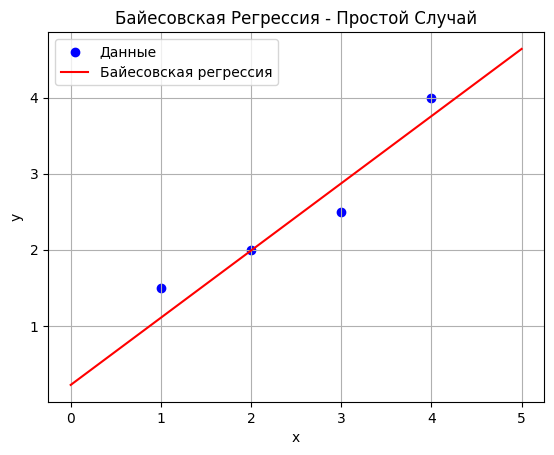

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Данные
X = np.array([[1, 1], [2, 1], [3, 1], [4, 1]])  # добавляем единичный столбец для intercept
y = np.array([1.5, 2.0, 2.5, 4.0])

# Параметры
sigma2 = 0.25  # Дисперсия ошибок
Sigma0 = 1     # Дисперсия априорного распределения
mu0 = 0        # Среднее априорного распределения

# Вычисление X^T * X
XtX = np.dot(X.T, X)

# Вычисление Σ_n
Sigma_n_inv = (1 / sigma2) * XtX + (1 / Sigma0)
Sigma_n = np.linalg.inv(Sigma_n_inv)

# Вычисление X^T * y
Xt_y = np.dot(X.T, y)

# Вычисление μ_n
mu_n = np.dot(Sigma_n, (1 / sigma2) * Xt_y + (1 / Sigma0) * mu0)

# Итоговые результаты
print("Ковариационная матрица Σ_n:\n", Sigma_n)
print("Среднее μ_n:\n", mu_n)

# Визуализация
x_vals = np.linspace(0, 5, 100)
y_pred = mu_n[0] * x_vals + mu_n[1]

# Визуализация данных и предсказаний
plt.scatter(X[:, 0], y, color='blue', label='Данные')
plt.plot(x_vals, y_pred, color='red', label='Байесовская регрессия')
plt.title('Байесовская Регрессия - Простой Случай')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()



### Пример 2: Сложный случай

1.  Данные:
   ```
   | x   | y   |
   | --| --|
   | 1   | 2.5 |
   | 2   | 3.5 |
   | 3   | 5.0 |
   | 4   | 6.0 |
   | 5   | 7.5 |
   ```

2.  Априорное распределение:
   $$
   \beta \sim \mathcal{N}(0, 2)
   $$

3.  Дисперсия ошибки:
   $$
   \sigma^2 = 1
   $$

Теперь реализуем второй пример:


Ковариационная матрица Σ_n для второго примера:
 [[ 0.08461538 -0.23846154]
 [-0.23846154  0.85384615]]
Среднее μ_n для второго примера:
 [1.43461538 0.41153846]


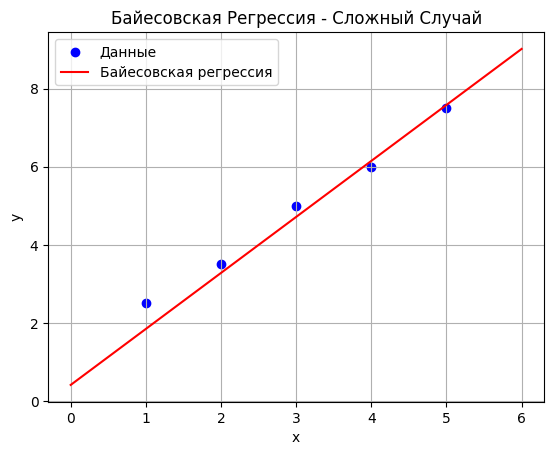

In [2]:
# Данные
X2 = np.array([[1, 1], [2, 1], [3, 1], [4, 1], [5, 1]])  # добавляем единичный столбец для intercept
y2 = np.array([2.5, 3.5, 5.0, 6.0, 7.5])

# Параметры
sigma2_2 = 1    # Дисперсия ошибок
Sigma0_2 = 2    # Дисперсия априорного распределения
mu0_2 = 0       # Среднее априорного распределения

# Вычисление X^T * X
XtX2 = np.dot(X2.T, X2)

# Вычисление Σ_n
Sigma_n_inv_2 = (1 / sigma2_2) * XtX2 + (1 / Sigma0_2)
Sigma_n_2 = np.linalg.inv(Sigma_n_inv_2)

# Вычисление X^T * y
Xt_y2 = np.dot(X2.T, y2)

# Вычисление μ_n
mu_n_2 = np.dot(Sigma_n_2, (1 / sigma2_2) * Xt_y2 + (1 / Sigma0_2) * mu0_2)

# Итоговые результаты
print("Ковариационная матрица Σ_n для второго примера:\n", Sigma_n_2)
print("Среднее μ_n для второго примера:\n", mu_n_2)

# Визуализация
x_vals_2 = np.linspace(0, 6, 100)
y_pred_2 = mu_n_2[0] * x_vals_2 + mu_n_2[1]

# Визуализация данных и предсказаний
plt.scatter(X2[:, 0], y2, color='blue', label='Данные')
plt.plot(x_vals_2, y_pred_2, color='red', label='Байесовская регрессия')
plt.title('Байесовская Регрессия - Сложный Случай')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()







### Вопросы для самопроверки

1. Что такое байесовская регрессия и как она отличается от классической линейной регрессии?
2. Объясните, что такое априорное распределение и как оно используется в байесовской регрессии.
3. Каково значение апостериорного распределения в контексте байесовской регрессии?
4. В чем заключается теорема Байеса и как она применяется для получения апостериорного распределения?
5. Каково математическое выражение правдоподобия для модели линейной регрессии с нормальным распределением ошибок?
6. Что такое дисперсия ошибок в контексте линейной регрессии?
7. Как вычислить ковариационную матрицу для параметров регрессии в байесовской модели?
8. Что такое матрица дизайна и как она формируется?
9. Объясните, как получить среднее апостериорное распределение для параметров модели.
10. Как байесовская регрессия учитывает неопределенности в оценках параметров?
11. Каковы преимущества использования байесовской регрессии по сравнению с другими методами регрессии?
12. Что происходит с апостериорным распределением, если мы добавляем больше данных?
13. Как визуализировать результаты байесовской регрессии?
14. Какой эффект оказывает выбор априорного распределения на апостериорные оценки?
15. Объясните, что такое маргинальное распределение и как оно связано с байесовской регрессией.

### Задачи для самостоятельной работы

1. Рассчитайте апостериорное распределение для набора данных, состоящего из 5 наблюдений, где $y = 2 + 3x + \epsilon$ и $\epsilon \sim \mathcal{N}(0, 1)$.
2. Реализуйте байесовскую регрессию для произвольного набора данных с 10 наблюдениями. Используйте априорное распределение $\beta \sim \mathcal{N}(0, 1)$.
3. Постройте график, который демонстрирует, как меняется апостериорное распределение при добавлении данных.
4. Измените априорное распределение на $\beta \sim \mathcal{N}(0, 5)$ и сравните с предыдущими результатами.
5. Рассчитайте апостериорное распределение для данных с несколькими предикторами (например, 2 или 3).
6. Сгенерируйте случайные данные с известными параметрами, примените байесовскую регрессию и оцените параметры.
7. Сравните результаты байесовской регрессии с классической линейной регрессией для одного и того же набора данных.
8. Проведите анализ чувствительности, варьируя параметры априорного распределения и наблюдая на изменения апостериорного распределения.
9. Реализуйте визуализацию предсказаний модели, используя доверительные интервалы для предсказанных значений.
10. Рассчитайте и проанализируйте эффект изменения дисперсии ошибки на параметры модели.
11. Исследуйте, как меняются оценки параметров при наличии выбросов в данных.
12. Рассмотрите сценарий с несколькими апостериорными параметрами и оцените их корреляцию.
13. Сгенерируйте данные, подверженные мультиколлинеарности, и изучите влияние этого на байесовскую регрессию.
14. Постройте байесовскую модель для полиномиальных данных (например, второго или третьего порядка) и визуализируйте результаты.
15. Используйте метод кросс-валидации для оценки стабильности байесовской регрессии при различных наборах данных.
16. Исследуйте влияние различных размеров выборки на результаты байесовской регрессии.
17. Реализуйте алгоритм MCMC (Markov Chain Monte Carlo) для оценки параметров модели и сравните его с аналитическим подходом.
18. Сравните байесовскую регрессию с регрессией на основе деревьев решений (например, случайный лес).
19. Рассчитайте маргинальное правдоподобие для вашей модели и обсудите его значение.
20. Изучите, как использование различных функций потерь влияет на оценки параметров в байесовской регрессии.
21. Разработайте симуляцию, чтобы показать, как байесовская регрессия адаптируется к изменениям в данных.
22. Исследуйте эффект применения различных методов оптимизации для нахождения параметров в байесовской регрессии.
23. Постройте модель с учетом нескольких уровней неопределенности (например, неоднородные дисперсии).
24. Примените байесовскую регрессию для временных рядов и проанализируйте результаты.
25. Изучите применение байесовской регрессии в области машинного обучения и искусственного интеллекта.
26. Исследуйте, как применяются байесовские модели в реальных задачах (например, в экономике, медицине).
27. Разработайте и протестируйте собственный байесовский регрессионный алгоритм с нуля.
28. Оцените влияние нехватки данных на оценку параметров модели.
29. Изучите, как различные методы регуляризации влияют на параметры модели в контексте байесовской регрессии.
30. Подготовьте отчет о проделанной работе, включив графики, результаты и выводы.

